<a href="https://colab.research.google.com/github/El-Lion-AI/AI-Python-Repo/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf # Main deep learning library - used to build and train neural networks
from tensorflow.keras.datasets import mnist # Built-in dataset of handwrittendigits(0-9) for training/testing
from tensorflow.keras.models import Sequential # Allows us to build a model layer-by-layer (like stacking blocks)
from tensorflow.keras.layers import Dense, Flatten # Dense = fully connected brain-like layer, Flatten = reshapes 2D image to 1D
from tensorflow.keras.utils import to_categorical  # Converts digit labels into one-hot encoded format (e.g, 3-> [0,0,0,1,...])
import matplotlib.pyplot as plt  # Used to visiualize images and training performance (accuracy,loss graphs)
import numpy as np # Handles numerical operations like scalingand reshaping dataefficiently

In [3]:
# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255) to (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes for confirmation
print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [4]:
# Build a simple model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Compile model with optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0389 - val_accuracy: 0.9740 - val_loss: 0.0867
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9926 - loss: 0.0272 - val_accuracy: 0.9743 - val_loss: 0.0895
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9932 - loss: 0.0238 - val_accuracy: 0.9729 - val_loss: 0.0985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9941 - loss: 0.0198 - val_accuracy: 0.9741 - val_loss: 0.0942
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9960 - loss: 0.0143 - val_accuracy: 0.9732 - val_loss: 0.0999
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9971 - loss: 0.0108 - val_accuracy: 0.9761 - val_loss: 0.0987
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9980 - loss: 0.0083 - val_accuracy: 0.9759 - val_loss: 0.1032
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9979 - loss: 0.0091 -

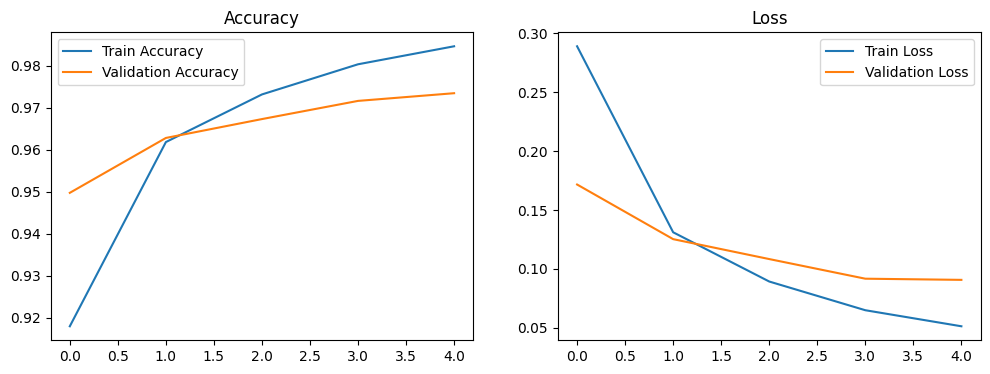

In [7]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


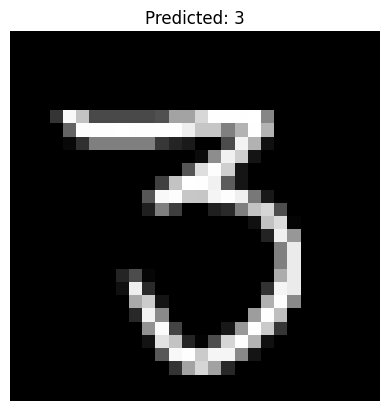

In [12]:
# Make prediction on one test image
index = 2587
sample_image = np.expand_dims(x_test[index], axis=0)
prediction = model.predict(sample_image)

# Show the image and prediction
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {np.argmax(prediction)}")
plt.axis('off')
plt.show()